#Universitario: Ceron Beimar Miguel
#Carrera: Ingenieria de Sistemas
#Datashet: Airline passenger satisfaction	https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv
# Repositorio GITHub:
# https://github.com/Beimar98/SIS420/tree/main/Examen%20Fina%20IA 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize

In [ ]:
#Separacion = ","
Nombre_del_DATASET = "/content/train.csv"
#Tipo = "csv"
Columnas = ["Gender", "Customer Type", "Age", "Type of Travel", "Class", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes", "satisfaction"]
Excepcion = ["Age", "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [35]:
#-----------------------------------------------------------------------------------------------------------------------------------------
Nuevos_datos = {}
Ruta = Nombre_del_DATASET
Datos_Originales = pd.read_csv(Ruta)

Datos = Datos_Originales.loc[:,Columnas]
Nuevos_datos = Datos.dropna()
#-----------------------------------------------------------------------------------------------------------------------------------------
Nombre_columnas = Nuevos_datos.columns
columnas = []
for k in  Nombre_columnas:
  columnas.append(k)
if (len(Excepcion) > 0):
  for exc in Excepcion:
    columnas.remove(exc)

Nombre_Columnas = columnas
#-----------------------------------------------------------------------------------------------------------------------------------------
Columna_y_datos = {}
for col in Nombre_Columnas:
  Datos_de_columnas = Nuevos_datos[col].unique()
  Iguales = []
  contador = 0
  for dato in Datos_de_columnas:
    Iguales.append([dato,contador])
    contador +=1
  Columna_y_datos[col] = Iguales
#-----------------------------------------------------------------------------------------------------------------------------------------
Auxiliar = []
for igu in Columna_y_datos: 
  Auxiliar = Columna_y_datos[igu]
  diccionario = {}
  contador = 1
  for dato in Auxiliar:
    diccionario[dato[0]] = dato[1]
  Nuevos_datos[igu] = Nuevos_datos[igu].map(diccionario)
#-----------------------------------------------------------------------------------------------------------------------------------------
Nombre_documento = "Nuevo_DataSet.txt"
Nuevos_datos.to_csv(Nombre_documento, index=0, header = 0)
Nombre_documento = pd.read_csv('Nuevo_DataSet.txt', header=None)
Nombre_documento


<ipython-input-35-963dbdbb28b4>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nuevos_datos[igu] = Nuevos_datos[igu].map(diccionario)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,1,1,23,1,2,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103590,0,0,49,1,1,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103591,0,1,30,1,1,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103592,1,1,22,1,2,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [37]:
Nombre_documento.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.507520,0.182752,39.380466,0.689857,1.377676,1189.325202,2.729753,3.060081,2.756984,2.977026,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,0.499946,0.386465,15.113125,0.462554,0.615807,997.297235,1.327866,1.525233,1.398934,1.277723,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [ ]:
data = np.loadtxt(Nombre_documento,  delimiter=",")
Tamaño_de_columnas = len(Columnas)-1
X = data[:, :Tamaño_de_columnas]
y = data[:, Tamaño_de_columnas]
m, n = X.shape
X_array = [1,1,2,20,2,3,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0]
alpha = 0.001
num_iters = 500
theta = np.zeros(Tamaño_de_columnas+1)

# Regresion Logistica

In [ ]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [ ]:
def costFunction(theta, X, y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    return J, grad

In [ ]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [ ]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

<ipython-input-29-37ba680871e6>:5: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


theta calculado por el descenso por el gradiente:
[2.17196913e-01 3.25898073e-01 2.38930469e-01 9.06647383e+00
 4.18489773e-01 4.67572026e-01 3.32180010e+02 6.86385244e-01
 6.45095305e-01 6.58255338e-01 6.46743064e-01 7.64550654e-01
 8.74325405e-01 8.61190508e-01 8.60942255e-01 8.37618096e-01
 8.29986220e-01 8.61310602e-01 7.91654478e-01 8.62082558e-01
 8.12973971e-01 2.72613181e+00 2.74464457e+00]
La probabilidad de que los pasajeros esten satisfechos es de: (usando el descenso por el gradiente):1.0


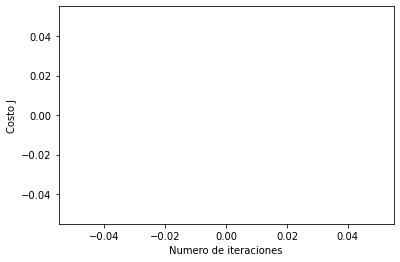

In [ ]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
print('theta calculado por el descenso por el gradiente:')
print(theta)
satisfecho = sigmoid(np.dot(X_array, theta))
print(f"La probabilidad de que los pasajeros esten satisfechos es de: (usando el descenso por el gradiente):{satisfecho}")

In [ ]:
initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta, X, y)
prob = sigmoid(np.dot(X_array, theta))
print("La probabilidad de que la persona este Satisfecha es:", prob*100, " %")
p = predict(theta, X)
print("Precisión de entrenamiento fue de: ", np.mean(p == y) * 100, " %")

La probabilidad de que la persona este Satisfecha es: 100.0  %
Precisión de entrenamiento fue de:  56.660617410274725  %


ONe

In [39]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y 
    el gradiente del costo w.r.t. a los parámetros.
    
    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas 
        incluida la intercepcion
        
    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de 
        caracteristicas (incluida la intercepcion).
    
    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos
    
    lambda_ : float
        Parametro de regularización. 
    
    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada. 
    
    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la 
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size
    
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp

    return J, grad

ONe

In [40]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 6050}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

NYSS

xfcgvnbm

In [48]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


fhgjh

In [49]:

J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


Cod

In [50]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 6050}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

TC_T

In [53]:
# Ingresar imágenes de dígitos de 20x20
# input_layer_size  = 400

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 3

#  datos de entrenamiento almacenados en los arreglos X, y
# data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
X, y = data[:15000,:4], data[:15000,4]
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
# y[y == 10] = 0

m = y.size

LAS

In [54]:
lambda_ = 0.8
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta)

[[-2.57208882e-02 -3.88059614e-02 -3.04346696e-02 -1.00752663e+00
  -4.35471784e-02]
 [-9.41071618e-01  1.33391890e-01 -6.46567089e-01 -4.96888617e-03
  -5.56066551e-01]
 [-4.81283359e+00 -8.55354877e-02 -1.50873184e+00  3.44069712e-03
   3.71709591e+00]]


In [57]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 6050}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

In [58]:
lambda_ = 0.8



all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta)

[[-2.57208882e-02 -3.88059614e-02 -3.04346696e-02 -1.00752663e+00
  -4.35471784e-02]
 [-9.41071618e-01  1.33391890e-01 -6.46567089e-01 -4.96888617e-03
  -5.56066551e-01]
 [-4.81283359e+00 -8.55354877e-02 -1.50873184e+00  3.44069712e-03
   3.71709591e+00]]


In [60]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas. 
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase. 
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1] 
    predice clases 0, 2, 0, 1 para 4 ejemplos).
    
    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is number of data points to predict, and n is number 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """
    
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

Pred

In [61]:
# print(X.shape)
XPrueba = data[8000:,:4].copy()
# print(XPrueba.shape)

#print(XPrueba)
pred = predictOneVsAll(all_theta, XPrueba)

print(pred)
#print(data[15000:,4])
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == data[8000:,4]) * 100))
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
# XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
# print(XPrueba.shape)
# p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
# print(p)

# displayData(X[4002:4003, :])

[1 2 1 ... 2 2 2]
Precision del conjuto de entrenamiento: 49.16%
